In [1]:
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
NaturalBlurSet = pd.read_excel("C:/Users/LASYA/CERTH_ImageBlurDataset/EvaluationSet/NaturalBlurSet.xlsx")
DigitalBlurSet = pd.read_excel("C:/Users/LASYA/CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet.xlsx")

In [3]:
DigitalBlurSet = DigitalBlurSet.rename(index=str, columns={"Unnamed: 1": "Blur Label"})
DigitalBlurSet = DigitalBlurSet.rename(index=str, columns={"MyDigital Blur": "Image Name"})

In [4]:
def laplacian_variance(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [5]:
# loop over the input images
def detect(imgPath):
    image = cv2.imread(imgPath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = laplacian_variance(gray)
    label = -1
    if fm < 100:
        label = 1
    return label

In [6]:
Natural_predicted_value = []
Natural_original_value = []
Digital_predicted_value = []
Digital_original_value = []

for name,label in zip(NaturalBlurSet["Image Name"],NaturalBlurSet["Blur Label"]):
    p = 'C:/Users/LASYA/CERTH_ImageBlurDataset/EvaluationSet/NaturalBlurSet'
    img_path=os.path.join(p ,name +'.jpg')
    Natural_predicted_value.append(detect(img_path))
    Natural_original_value.append(label)
    
for name,label in zip(DigitalBlurSet["Image Name"],DigitalBlurSet["Blur Label"]):
    p = 'C:/Users/LASYA/CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet'
    img_path=os.path.join(p ,name)
    Digital_predicted_value.append(detect(img_path))
    Digital_original_value.append(label)    


In [8]:
print("Test Accuracy Score for NaturalBlusSet:",accuracy_score(Natural_original_value,Natural_predicted_value))
print("Test Accuracy Score for DigitalBlusSet:",accuracy_score(Digital_original_value,Digital_predicted_value))

Test Accuracy Score for NaturalBlusSet: 0.712
Test Accuracy Score for DigitalBlusSet: 0.98125


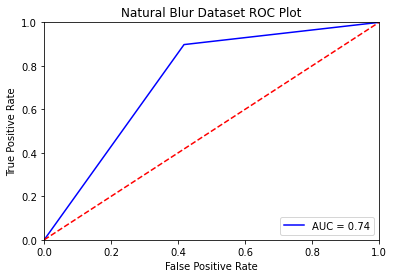

In [9]:
fpr, tpr, threshold=roc_curve(Natural_original_value,Natural_predicted_value)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Natural Blur Dataset ROC Plot")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

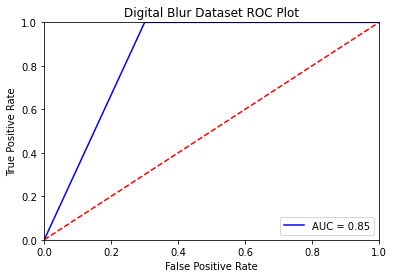

In [10]:
fpr, tpr, threshold=roc_curve(Digital_original_value,Digital_predicted_value)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Digital Blur Dataset ROC Plot")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()